Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [21]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period = "max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

if response.status_code == 200 :
    html_data = response.text
    print("Success")
else :
    print(f"Failure {response.status_code}")

Success


In [22]:
soup = BeautifulSoup(html_data,"html.parser")
tables = soup.find_all('table')
tesla_table = tables[0]

rows = tesla_table.find_all('tr')

dates = []
revenues = []

#Iterate over rows to extract the data 
for row in rows[1:] :# Skip the first row 
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    dates.append(date)
    revenues.append(revenue)

tesla_revenue = pd.DataFrame({'Date':dates,'Revenue':revenues})
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'],errors='coerce')
tesla_revenue.tail()



,Date,Revenue
8,2013-01-01,NaN
9,2012-01-01,NaN
10,2011-01-01,NaN
11,2010-01-01,NaN
12,2009-01-01,NaN


Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [23]:
import yfinance as yf
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period = "max")
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [5]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [6]:
url2 = "https://companiesmarketcap.com/gamestop/revenue/"
response2 = requests.get(url2)

if response2.status_code == 200 :
    html_data2 = response2.text
    print("Success")
else :
    print(f"Failure {response2.status_code}")   

Success


In [24]:
soup2 = BeautifulSoup(html_data2,"html.parser")

tables2 = soup2.find_all('table')
gamestop_table = tables2[0]

rows2 = gamestop_table.find_all('tr')

dates2 = []
revenues2 = []

for row in rows2[1:]:
    cols2 = row.find_all('td')
    date2 = cols2[0].text.strip()[:4]
    revenue2 = cols2[1].text.strip()
    dates2.append(date2)
    revenues2.append(revenue2)

gamestop_revenue = pd.DataFrame({"Date_Gamestop":dates2,"Revenue_Gamestop":revenues2})
gamestop_revenue.tail() 

,Date_Gamestop,Revenue_Gamestop
18,2006,$4.68 B
19,2005,$2.13 B
20,2004,$1.75 B
21,2003,$1.47 B
22,2002,$1.34 B


Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

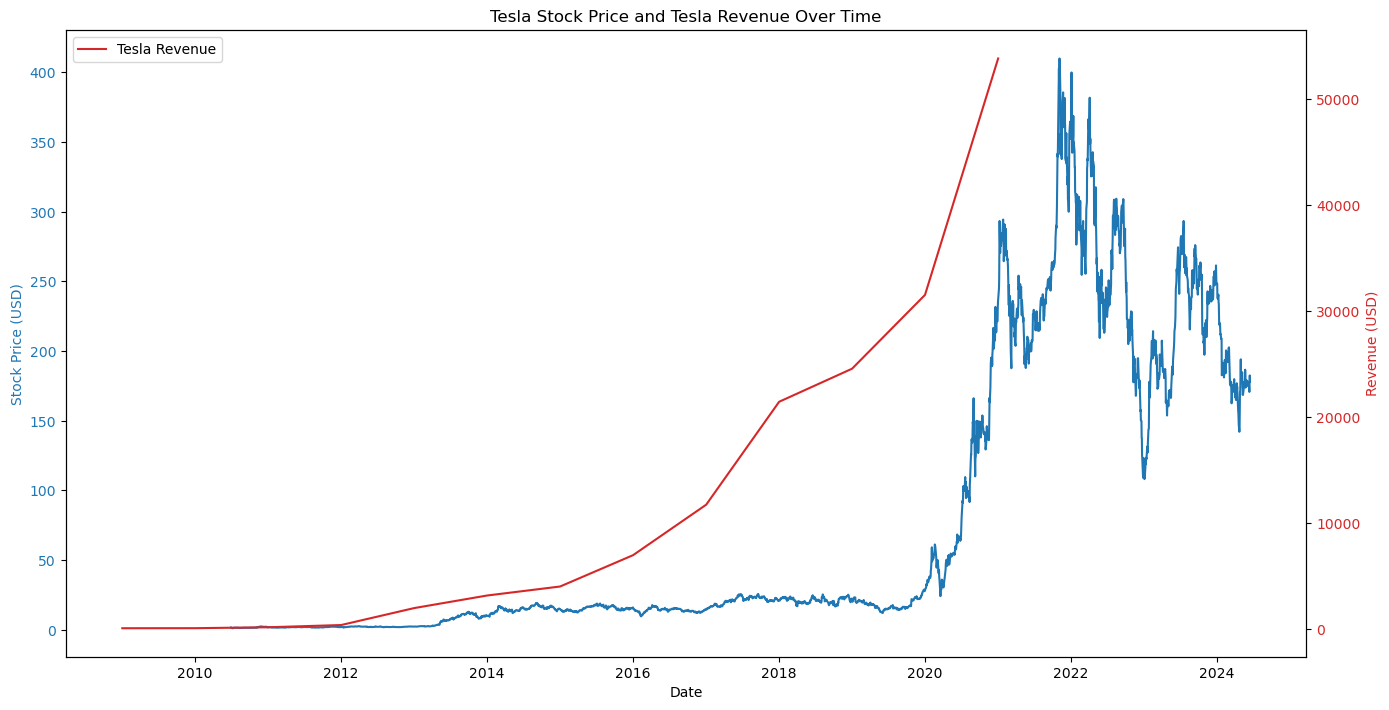

In [19]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Fetch Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

if response.status_code == 200:
    html_data = response.text
else:
    raise Exception(f"Failed to fetch data from URL. Status code: {response.status_code}")

soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all('table')
tesla_table = tables[0]

rows = tesla_table.find_all('tr')

dates = []
revenues = []

for row in rows[1:]:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace(',', '').replace('$', '')
    dates.append(date)
    revenues.append(revenue)

tesla_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Define the function to make the graph
def make_graph(stock_data, revenue_data, stock_title, revenue_title, y_stock, y_revenue):
    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel(y_stock, color='tab:blue')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue', label=stock_title)
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel(y_revenue, color='tab:red')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:red', label=revenue_title)
    ax2.tick_params(axis='y', labelcolor='tab:red')
    
    fig.tight_layout()
    plt.title(f'{stock_title} and {revenue_title} Over Time')
    plt.legend(loc='upper left')
    plt.show()

# Call the function with the Tesla data
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Price', 'Tesla Revenue', 'Stock Price (USD)', 'Revenue (USD)')


Question 6 - GameStop Stock and Revenue Dashboard- 2 Points


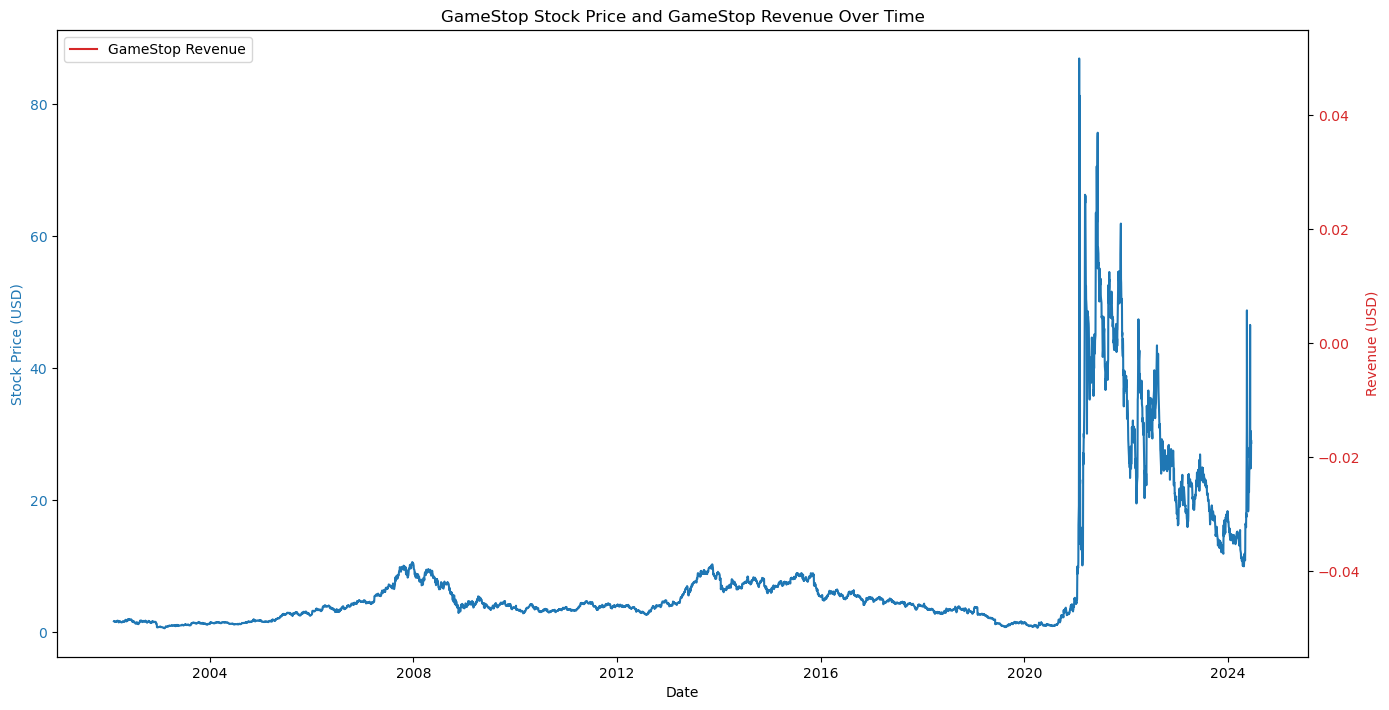

In [20]:
import yfinance as yf
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Fetch GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)

# Fetch GameStop revenue data
url2 = "https://companiesmarketcap.com/gamestop/revenue/"
response2 = requests.get(url2)

if response2.status_code == 200:
    html_data2 = response2.text
else:
    raise Exception(f"Failed to fetch data from URL. Status code: {response2.status_code}")

soup2 = BeautifulSoup(html_data2, "html.parser")
tables2 = soup2.find_all('table')
gamestop_table = tables2[0]

rows2 = gamestop_table.find_all('tr')

dates2 = []
revenues2 = []

for row in rows2[1:]:
    cols2 = row.find_all('td')
    date2 = cols2[0].text.strip()[:4]
    revenue2 = cols2[1].text.strip().replace(',', '').replace('$', '')
    dates2.append(date2)
    revenues2.append(revenue2)

gamestop_revenue = pd.DataFrame({"Date": dates2, "Revenue": revenues2})
gamestop_revenue['Date'] = pd.to_datetime(gamestop_revenue['Date'] + "-12-31")
gamestop_revenue['Revenue'] = pd.to_numeric(gamestop_revenue['Revenue'], errors='coerce')

# Define the function to make the graph
def make_graph(stock_data, revenue_data, stock_title, revenue_title, y_stock, y_revenue):
    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel(y_stock, color='tab:blue')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue', label=stock_title)
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel(y_revenue, color='tab:red')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:red', label=revenue_title)
    ax2.tick_params(axis='y', labelcolor='tab:red')
    
    fig.tight_layout()
    plt.title(f'{stock_title} and {revenue_title} Over Time')
    plt.legend(loc='upper left')
    plt.show()

# Call the function with the GameStop data
make_graph(gamestop_data, gamestop_revenue, 'GameStop Stock Price', 'GameStop Revenue', 'Stock Price (USD)', 'Revenue (USD)')
